# Рынок BMW

## Описание

Для простоты рассмотрим рынок BMW, выпущенных после 2010 года. Данные берутся с 3 наиболее популярных сайтов по продаже авто в России — Авто.ру, Авито, Дром

## Сбор данных

Так как каждый сайт имеет свой HTML-код, то код для парсинга каждого сайта будет отличаться. Используется динамический парсинг с помощью Selenium

### Основные критерии

- Модель
- Год выпуска
- Объем двигателя
- Бензин/дизель
- Привод
- Мощность (л.с.)
- Пробег
- КПП
- Цена
- Тип (седан/внедорожник/кроссовер) (???)


In [133]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import time
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import importlib
import avito_parser
importlib.reload(avito_parser)
import avito_parser


### Парсинг с Авито Авто

In [134]:
num_pages = 100                      # кол-во страниц, которые хоти обработать
year = 2010                         # самый ранний год выпуска машины
non_dymanic = True                  # если нужно, чтобы браузер НЕ открывался в явном виде, то поставить True

In [135]:
responses = avito_parser.parse_html(num_pages)

In [136]:
cars = avito_parser.collect_data(responses)

In [139]:
for car in cars:
    avito_parser.modify_gen(car)
    # print(car)

In [140]:
df = pd.DataFrame([{
        "Модель": car.model,
        "Серия": car.gen,
        "Год": car.year,
        "Объем двигателя (л)": car.engine_volume,
        "Топливо": car.fuel_type,
        "Привод": car.drive,
        "Мощность (л.с.)": car.power_hp,
        "Пробег (км)": car.mileage,
        "КПП": car.transmission,
        "Цена (₽)": car.price,
        "Ссылка": car.url
    } for car in cars])

df

,Модель,Серия,Год,Объем двигателя (л),Топливо,Привод,Мощность (л.с.),Пробег (км),КПП,Цена (₽),Ссылка
0,"BMW 6 серия GT 2.0 AT, 2020, 121 000 км",6-Series,2020,2.0,дизель,задний,190,121000,,3590000,https://www.avito.ru/krasnodar/avtomobili/bmw_...
1,"BMW X6 3.0 AT, 2017, 210 000 км",X6,2017,3.0,дизель,полный,249,210000,,3870000,https://www.avito.ru/sankt-peterburg/avtomobil...
2,"BMW X3 2.0 AT, 2021, 24 000 км",X3,2021,2.0,бензин,полный,249,24000,,5800000,https://www.avito.ru/moskva/avtomobili/bmw_x3_...
3,"BMW X3 M 3.0 AT, 2019, 52 000 км",X3,2019,3.0,бензин,полный,510,52000,,7250000,https://www.avito.ru/krasnodar/avtomobili/bmw_...
4,"BMW X4 2.0 AT, 2024, 5 км",X4,2024,2.0,бензин,полный,249,5,,7700000,https://www.avito.ru/moskva/avtomobili/bmw_x4_...
...,...,...,...,...,...,...,...,...,...,...,...
1567,"BMW X4 2.0 AT, 2015, 150 000 км",X4,2015,2.0,бензин,полный,245,150000,,2740000,https://www.avito.ru/moskva/avtomobili/bmw_x4_...
1568,"BMW X5 3.0 AT, 2020, 85 789 км",X5,2020,3.0,дизель,полный,400,85789,,8150000,https://www.avito.ru/moskva/avtomobili/bmw_x5_...
1569,"BMW X1 2.0 AT, 2017, 99 179 км",X1,2017,2.0,бензин,полный,192,99179,,2750000,https://www.avito.ru/nizhniy_novgorod/avtomobi...
1570,"BMW M4 3.0 AT, 2024, 60 км",M4,2024,3.0,бензин,полный,530,60,,21000000,https://www.avito.ru/moskva/avtomobili/bmw_m4_...


In [141]:
df.to_csv("cars.csv", index=False, encoding="utf-8-sig")

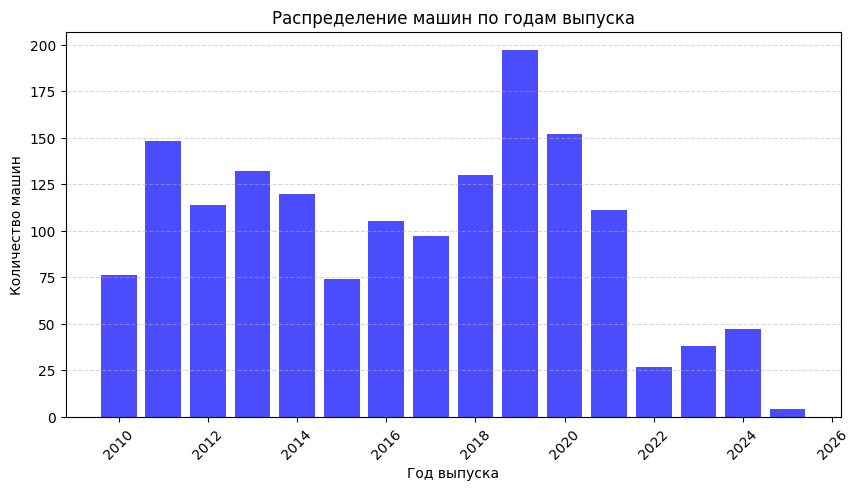

In [142]:
years = [car.year for car in cars]

year_counts = Counter(years)

x = sorted(year_counts.keys())
y = [year_counts[year] for year in x]

plt.figure(figsize=(10, 5))
plt.bar(x, y, color='blue', alpha=0.7)
plt.xlabel("Год выпуска")
plt.ylabel("Количество машин")
plt.title("Распределение машин по годам выпуска")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

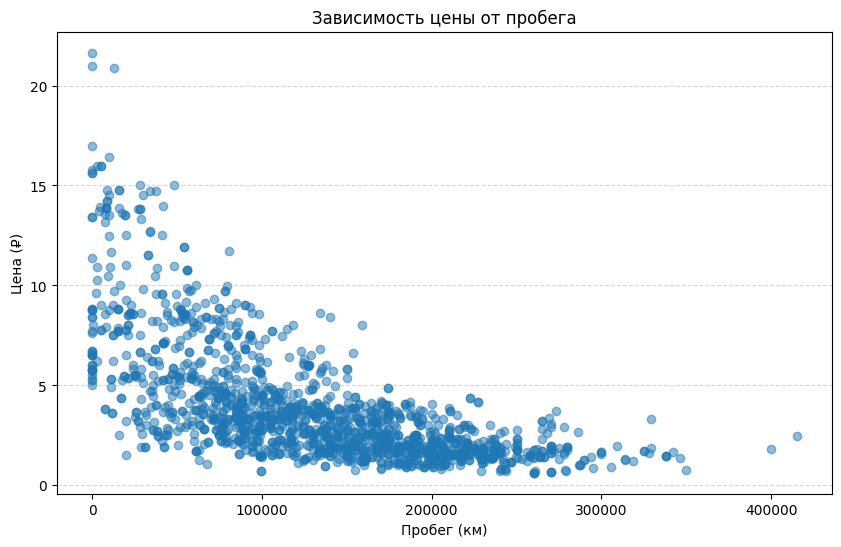

Корреляция между ценой и пробегом: -0.65


In [144]:
mileages = [int(car.mileage) for car in cars]
prices = [car.price / 1000000 for car in cars]

plt.figure(figsize=(10, 6))
plt.scatter(mileages, prices, alpha=0.5)
plt.xlabel("Пробег (км)")
plt.ylabel("Цена (₽)")
plt.title("Зависимость цены от пробега")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

correlation = np.corrcoef(mileages, prices)[0, 1]

print(f"Корреляция между ценой и пробегом: {round(correlation, 2)}")

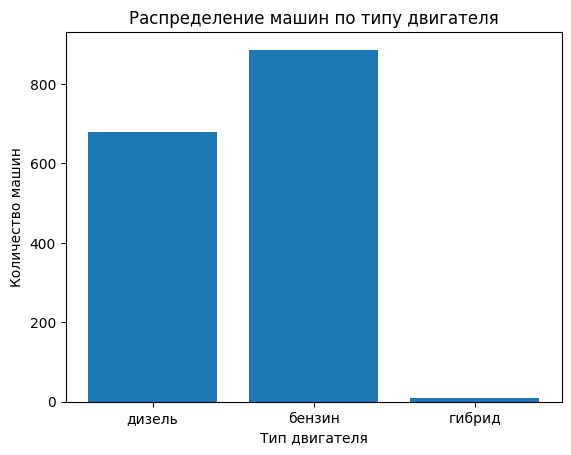

In [145]:
fuel_counts = Counter(car.fuel_type for car in cars)

plt.bar(fuel_counts.keys(), fuel_counts.values())
plt.xlabel("Тип двигателя")
plt.ylabel("Количество машин")
plt.title("Распределение машин по типу двигателя")
plt.show()

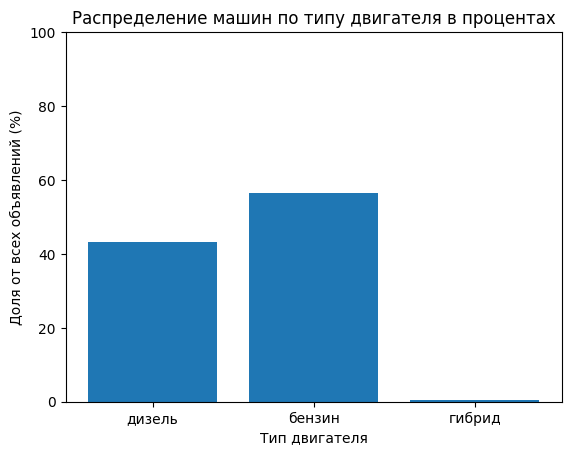

In [146]:
total_cars = len(cars)
fuel_counts = Counter(car.fuel_type for car in cars)
fuel_percentages = {key: (value / total_cars) * 100 for key, value in fuel_counts.items()}

plt.bar(fuel_percentages.keys(), fuel_percentages.values())
plt.xlabel("Тип двигателя")
plt.ylabel("Доля от всех объявлений (%)")
plt.title("Распределение машин по типу двигателя в процентах")
plt.ylim(0, 100)
plt.show()

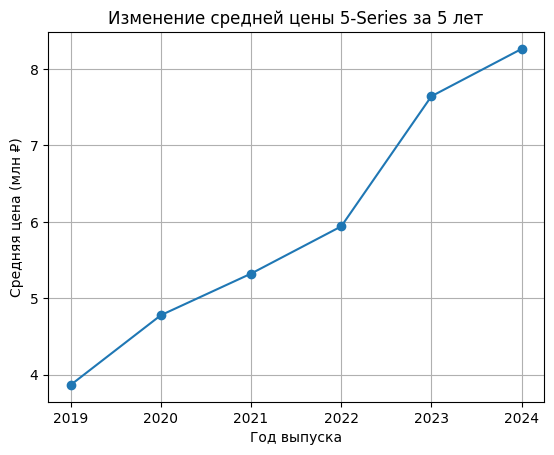

In [147]:
most_popular = Counter(car.gen for car in cars).most_common(1)[0][0]

filtered_cars = [car for car in cars if car.gen == most_popular]
years = sorted(set(car.year for car in filtered_cars if int(car.year) >= 2019))

avg_prices = [sum(car.price for car in filtered_cars if car.year == year) /
              sum(1 for car in filtered_cars if car.year == year) for year in years]
avg_prices = [price / 1000000 for price in avg_prices] 

plt.plot(years, avg_prices, marker='o')
plt.xlabel("Год выпуска")
plt.ylabel("Средняя цена (млн ₽)")
plt.title(f"Изменение средней цены {most_popular} за 5 лет")
plt.grid()
plt.show()

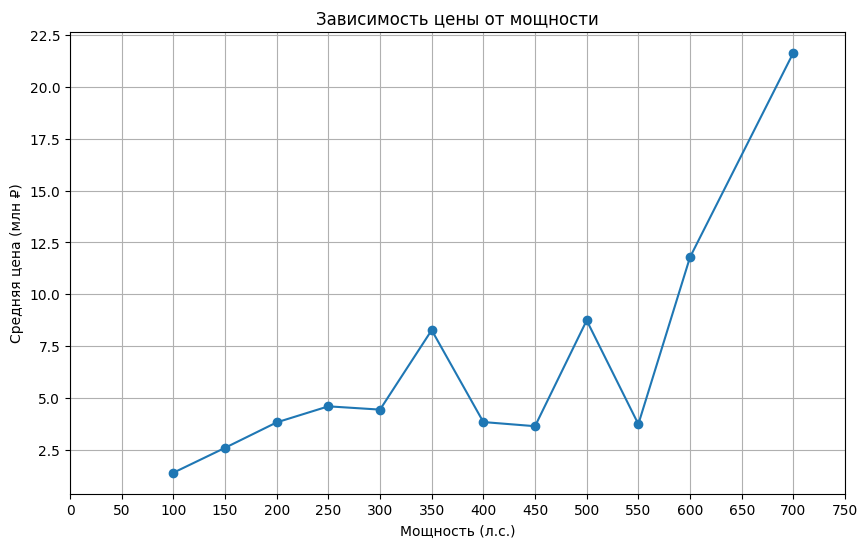

In [148]:
power_bins = range(0, max(car.power_hp for car in cars) + 50, 50)

power_avg_price = {}
for power in power_bins:
    cars_in_bin = [car.price for car in cars if power <= int(car.power_hp) < power + 50]
    if cars_in_bin:
        power_avg_price[power] = sum(cars_in_bin) / len(cars_in_bin) / 1_000_000 

powers = sorted(power_avg_price.keys())
avg_prices = [power_avg_price[p] for p in powers]

plt.figure(figsize=(10,6))
plt.plot(powers, avg_prices, marker='o', linestyle='-')
plt.xlabel("Мощность (л.с.)")
plt.ylabel("Средняя цена (млн ₽)")
plt.title("Зависимость цены от мощности")
plt.grid()

plt.xticks(power_bins)  

plt.show()

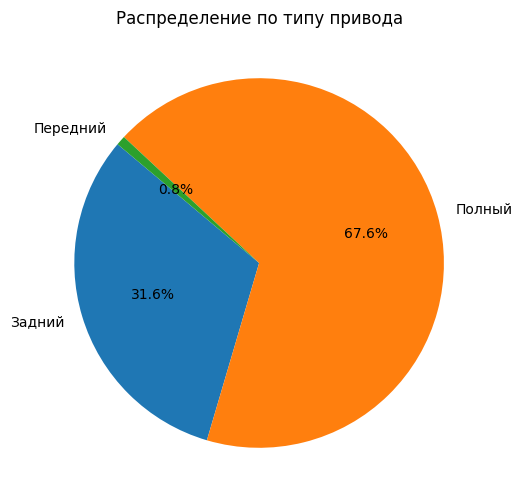

In [149]:
drive_mapping = {
    "передний": "Передний",
    "задний": "Задний",
    "4WD": "Полный",
    "полный": "Полный"
}

drive_types = [drive_mapping.get(car.drive, "Другой") for car in cars]
drive_counts = Counter(drive_types)

labels = drive_counts.keys()
sizes = drive_counts.values()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Распределение по типу привода")
plt.show()

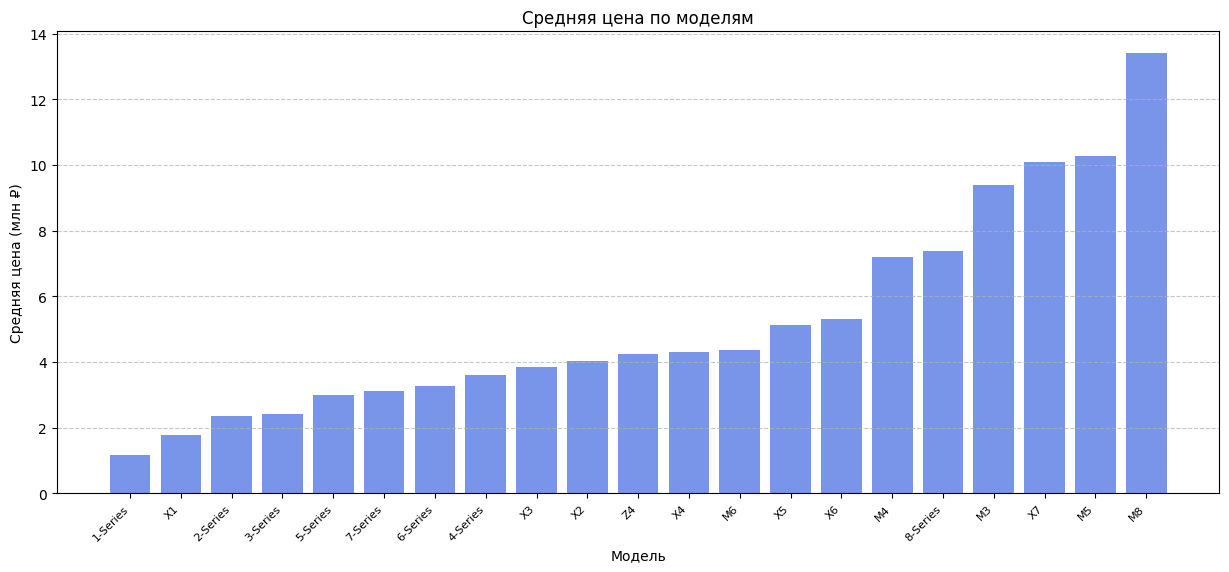

In [150]:
model_prices = {}
model_counts = Counter(car.gen for car in cars)

for model in model_counts:
    filtered = [car.price for car in cars if car.gen == model]
    if filtered:
        model_prices[model] = sum(filtered) / len(filtered)

sorted_models = sorted(model_prices.keys(), key=lambda x: model_prices[x], reverse=False)
sorted_avg_prices = [model_prices[model] / 1_000_000 for model in sorted_models]

plt.figure(figsize=(15, 6))
plt.bar(sorted_models, sorted_avg_prices, color='royalblue', alpha=0.7)
plt.xticks(rotation=45, ha="right", fontsize=8) 
plt.xlabel("Модель")
plt.ylabel("Средняя цена (млн ₽)")
plt.title("Средняя цена по моделям")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

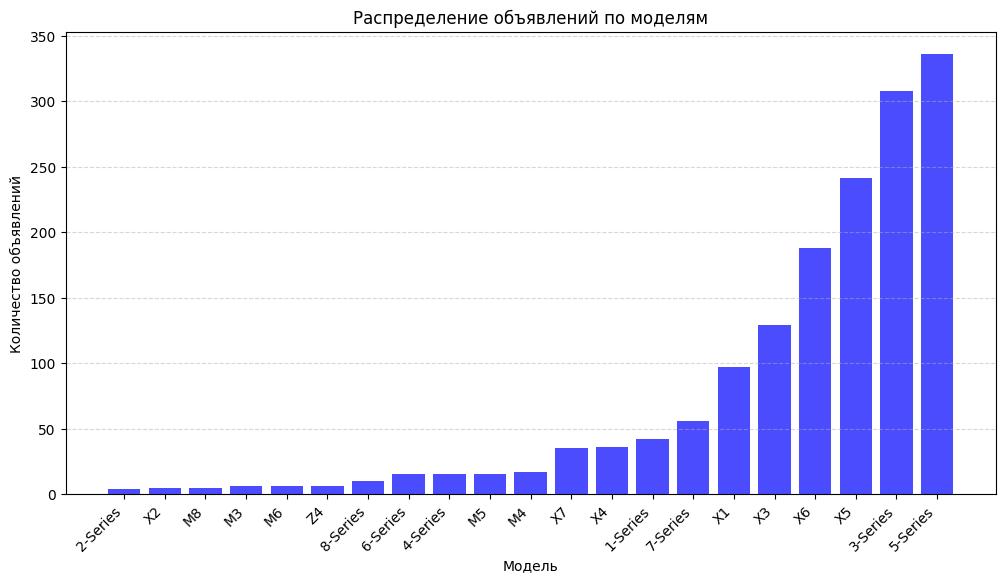

In [155]:
sorted_models = sorted(model_counts.items(), key=lambda item: item[1])
x, y = zip(*sorted_models)

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='blue', alpha=0.7)
plt.xlabel("Модель")
plt.ylabel("Количество объявлений")
plt.title("Распределение объявлений по моделям")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()